### 크롤링
- 웹 페이지를 그대로 가져와서 가져온 페이지에서 데이터를 추출해 내는 행위

### Requests 사용법

In [1]:
# 서버에 페이지 정보를 요청할때 사용하는 라이브러리
import requests as req

In [2]:
url = 'https://www.naver.com/'
res = req.get(url)
res
# <Response [200]> : 응답에 성공했다는 의미

<Response [200]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
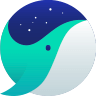
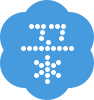

In [3]:
# html 코드 정보 보기
# text > 사람을 위한 글자정보가 담겨있음
# 컴퓨터에게 명령을 주기위해서 컴퓨터가 알수 있는 언어(html)로 변형이 필요
res.text

### BeautifulSoup 사용하기
- 가져온 html 코드에서 내가 원하는 내용만 추출할때 사용
- text데이터를 컴퓨터가 접근 가능하게 html문서화(bs객체화)진행

In [4]:
from bs4 import BeautifulSoup as bs

In [5]:
# 파싱  bs(파싱할 데이터, 파싱방법)
soup = bs(res.text, 'lxml')

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
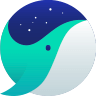
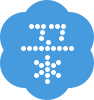

In [6]:
# 데이터를 확인해 보면 문자열이 아닌 html데이터로 변경된걸 확인 가능
soup

In [30]:
# 요소중에 하나(첫번째)만 가지고 오는 방법 select_one()
soup.select_one('a.nav')

<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>

In [32]:
# 요소들(복수개)가지고 올때는 select활용
# 리턴타입이 리스트 타입
# 인덱스, 반복문을 통해서 접근
# 요소를 들고오는개념(태그+컨텐츠)이기 때문에 순수한 글자정보만 얻기위해서
# .text를 통해서 글자정보만 추출
soup.select('a.nav')[2].text

'블로그'

### 광주날씨 크롤링

In [33]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B4%91%EC%A3%BC%EB%82%A0%EC%94%A8'
res = req.get(url)

In [35]:
soup = bs(res.text)

In [44]:
soup.select('div.temperature_text > strong')[0]

<strong><span class="blind">현재 온도</span>6<span class="celsius">°</span></strong>

### 멜론차트 수집

In [1]:
# 멜론 서버에서 사용자가 브라우저를 통해 접근한게 아니고 
# 코드를 통해서 접근했다는걸 감지해서 정보가 넘어오지 않음
# 브라우저로 접속한척 속이는 작업이 필요
# 네트워크 탭에서 헤더 정보들 중 user-agent 부분을 가지고 오기!

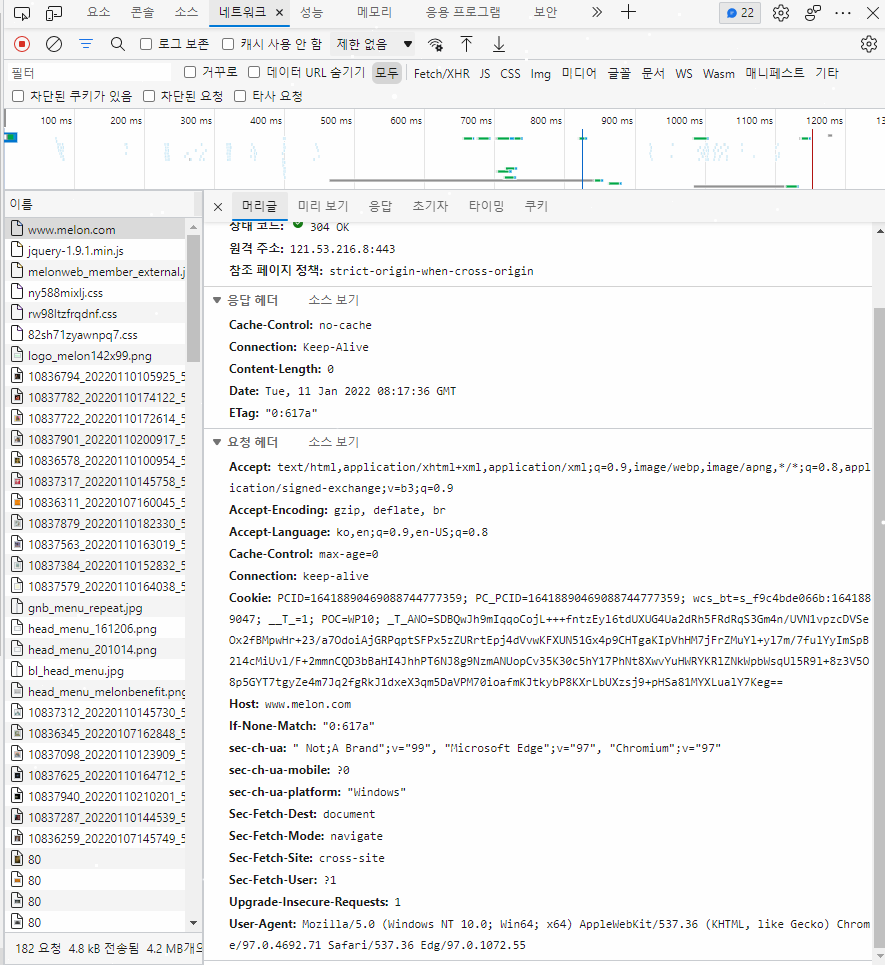

In [51]:
# head정보를 딕셔너리 형태로 제작
h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'}

In [52]:
# 페이지를 요청 할때 headers 공간에 만들어둔 head정보를 동반해서 요청
# 서버쪽에서는 브라우저가 접근했다고 인지해서 데이터를 돌려줌
# 응답코드 : 400번때 일때는 요청(request)의 오류 > 클라이언트
# 응답코드 : 500번때 일때는 응답(response)의 오류 > 서버
url = 'https://www.melon.com/chart/index.htm'
res = req.get(url, headers = h)
res # <Response [406]> : 응답 실패

<Response [200]>

In [53]:
soup = bs(res.text, 'lxml')

In [64]:
title = soup.select('div.ellipsis.rank01 > span > a')

In [71]:
singer = soup.select('div.ellipsis.rank02 > a:nth-child(1)')

In [ ]:
# 데이터의 개수가 정해진 데이터를 가지고 올때는
# 항상 길이를 확인을 해야함
# 정확한 데이터를 검증해야 밑에서 오류가 줄어듬

In [68]:
len(title)

100

In [75]:
title

[<a href="javascript:melon.play.playSong('1000002721',34398735);" title="Counting Stars (Feat. Beenzino) 재생">Counting Stars (Feat. Beenzino)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34256568);" title="회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom) 재생">회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34061322);" title="사랑은 늘 도망가 재생">사랑은 늘 도망가</a>,
 <a href="javascript:melon.play.playSong('1000002721',34298499);" title="리무진 (Feat. MINO) (Prod. GRAY) 재생">리무진 (Feat. MINO) (Prod. GRAY)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34481682);" title="겨울잠 재생">겨울잠</a>,
 <a href="javascript:melon.play.playSong('1000002721',34349913);" title="ELEVEN 재생">ELEVEN</a>,
 <a href="javascript:melon.play.playSong('1000002721',34431086);" title="취중고백 재생">취중고백</a>,
 <a href="javascript:melon.play.playSong('1000002721',34298496);" title="만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL) 재생">만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)</

In [72]:
len(singer)

100

In [77]:
#순수한 텍스트 정보만 담아주는 리스트를 제작 > 내가 들고온 데이터가 요소(컨텐츠+태그)이기 때문
# TIP!
# 배열을 생성하는 코드와 반복문이 한 셀안에 있어야 누적되는 오류를 방지
# 주의할점. 반복문안에 배열생성코드를 넣어버리면 매번 초기화가 되서 마지막 데이터만 저장
title_list = []
singer_list = []
rank_list = []

for i in range(len(title)):
    title_list.append(title[i].text)
    singer_list.append(singer[i].text)
    rank_list.append(i+1)

In [73]:
import pandas as pd

In [78]:
dic = {'노래제목':title_list, '가수' : singer_list, '순위':rank_list}

In [89]:
df = pd.DataFrame(dic)

In [90]:
# 내가 원하는 컬럼으로 인덱스를 대체하는 코드
df.set_index('순위', inplace = True)

In [91]:
df

,노래제목,가수
순위,,
1,Counting Stars (Feat. Beenzino),BE'O (비오)
2,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo
3,사랑은 늘 도망가,임영웅
4,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오)
5,겨울잠,아이유
...,...,...
96,All I Want for Christmas Is You,Mariah Carey
97,언덕나무,이승윤
98,너와 나의 Memories,염따
